# Top 500 Revije Rolling Stone



In [30]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 20
%matplotlib inline

V svoji nalogi bom analizirala top 500 skladb vseh časov po mnenju revije Rolling Stone, ki velja za eno najpomembnejših v svetu glasbene industrije. Za vsako skladbo sem pridobila podatke o mestu na lestvici, izvajalcu, naslovu, avtorju, producentu,zalozbi in letu izdaje. Prav tako pa tudi najvišje mesto na katerega je bila skladba uvrščena na ameriški glasbeni lestvici Billboard ter koliko tednov je bilo skupno na lestici ter tudi album na katerem je skladba izšla. Vse te podatke sem shranila v tabelo skladbe, ki je tudi prikazana spodaj. Kot vidimo sta tako avtor kot producent podana v obliki seznama, saj jih je večinoma več, zato sem te podatke shranila v dve ločeni tabeli avtorji in producenti. 
Naj še omenim, da so prvotno lestvico izdali leta 2004, leta 2010 pa so naredili nekaj minimalnh popravkov. 

In [214]:
skladbe = pd.read_csv('obdelani-podatki/skladbe.csv')
producenti = pd.read_csv('obdelani-podatki/producenti.csv')
avtorji = pd.read_csv('obdelani-podatki/avtorji.csv')
skladbe2 = skladbe[['izvajalec', 'leto',"zalozba","tedni","mesto"]]

In [215]:
skladbe.tail(5).sort_values("id", ascending = True) 

,id,izvajalec,naslov,avtor,producent,leto,zalozba,tedni,mesto,album
499,1,Bob Dylan,Like a Rolling Stone,['Dylan'],['Tom Wilson '],1965,Columbia,12.0,2.0,Bob Dylan at 70
498,2,The Rolling Stones,(I Can't Get No) Satisfaction,"[' Mick Jagger', 'Keith Richards']",['Andrew Loog Oldham'],1965,London,14.0,1.0,Out of Our Heads
497,3,John Lennon,Imagine,['John Lennon'],"['Lennon', 'Phil Spector', 'Yoko Ono']",1971,Apple,9.0,3.0,Imagine
496,4,Marvin Gaye,What's Going On,"['Gaye', 'Renaldo Benson', 'Al Cleveland']",['Gaye '],1971,Tamla,13.0,2.0,What's Going On
495,5,Aretha Franklin,Respect,['Otis Redding'],['Jerry Wexler'],1967,Atlantic,12.0,1.0,I Never Loved a Man the Way I Love You


## Časovna obdobja

Na začetku nas najprej zanima v katerem obdobju je bilo največ pesmi. To nam prikazuje naslednja tabela. Na prvem mestu je s 35 pesmi leto 1965, nato sledita leti 1966 in 1967. Za boljšo predstavo pa si oglejmo še graf števila pesmi v odvisnosti od leta. Opazimo lahko, da je največ pesmi prav v obdobju 60-ih let, čeprav ne gre zanemariti tudi 50-ih in 70-ih let. Medtem, ko lahko od 80-ih let najprej zasledimo večji padec. Slednje ugotovitve je še lažje videti na tortnem diagramu, ki je izrisan spodaj. 

In [216]:
skladbe_po_letih = skladbe.groupby('leto').size()
skladbe_po_letih.sort_values(ascending = False).head(5)

leto
1965    35
1966    28
1967    26
1969    25
1964    23
dtype: int64

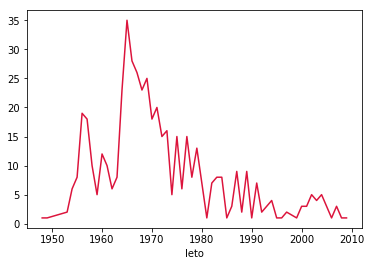

In [217]:
skladbe_po_letih.plot(y = "stevilo skladb", x = "leto",color = ["Crimson"])

Za še boljšo predstavo o razporeditvi skladb po desetletjih je spodaj prikazan tortni diagram. Razvidno je da skoraj 40% vseh pesmi pripada 60-im letom. Tukaj lahko tudi vidimo, da je delež skladb v 70-ih skoraj dvakrat večji kot v 50-ih, čeprav imajo 50-a leta na prejšnjem grafu višji vrh in bi po občutku lahko drugače sklepali. 

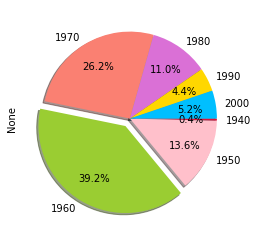

In [139]:
skladbe['desetletje'] = 10 * (skladbe.leto // 10)
colors = ["Crimson","Pink","YellowGreen","Salmon","Orchid","Gold","DeepSkyBlue"]
skladbe[skladbe.leto > 1930].groupby('desetletje').size().plot.pie(explode = (0, 0, 0.1, 0,0,0,0),
                                                                  shadow = True,autopct='%1.1f%%',pctdistance=0.7,
                                                                  counterclock = False,colors = colors)

## Izvajalci

Eno najpomembenjših vprašanj, ki se nam porajajo ob pogledu na lestvico je zagotovo kateri izvajalci so v tem prgledu popularne glasbe favorizirani. Graf, kjer je prikazanih prvih 10 izvajalcev po številu skladb, nam pove, kar smo po tihem tudi že pričakovali. Na prvem mestu mestu je z veliko prednostjo legendarna angleška skupina The Beatles, na lestvici imajo namreč uvrščenih kar 23 skladb. S po 13 skladbami jim sledi Skupina The Rolling Stones ter Bob Dylan. 

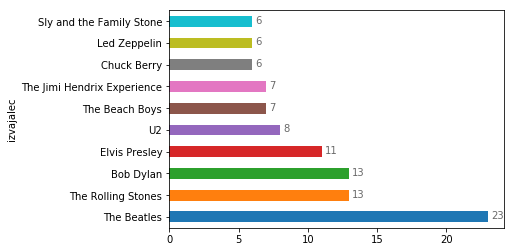

In [158]:
izvajalci = skladbe.groupby('izvajalec').size().sort_values(ascending = False)[0:10].plot.barh()
for i in izvajalci.patches:
    izvajalci.text(i.get_width()+.2, i.get_y()+.15, \
            i.get_width(), fontsize=10, color='dimgrey')

## Avtorji

Če si ogledamo še najbolj popularne avtorje skladb. Pričakovano je na prvem mestu dvojec Lennon - McCartney, vodilna člana skupine The Beatles, ki sta napisala skoraj vse njihove skladbe. Drugo mesto si delita Keith Richards iz skupine Rolling Stones in Bob Dylan, takoj za njima pa je Mick Jagger, prav tako iz skupine Rolling Stones. Ugotovimo lahko, da so zadnji trije napisali več skladb, kot pa jih imajo sami uvrščeni na lestvico. Opazimo pa tudi, da na lestvici ni Elvisa Presleya, za katerega pa tudi vemo, da so zanj pisali različni avtorji. 

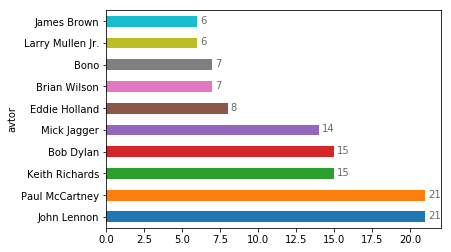

In [170]:
avtorji10 = avtorji.groupby("avtor").size().sort_values(ascending = False).head(10).plot.barh()
for i in avtorji10.patches:
    avtorji10.text(i.get_width()+.2, i.get_y()+.15, \
            i.get_width(), fontsize=10, color='dimgrey')

## Založbe

Če se osredotočimo še na "business" v glasbeni industriji. Najprej si oglejmo najmogočnejše založbe. Na prvem je ameriška Columbia Records s 43-imi skladbami, sledi ji Capitol Records s 33-imi in Atlantic s še eno manj. 

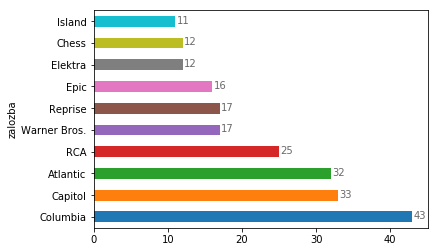

In [183]:
zalozbe = skladbe.groupby('zalozba').size().sort_values(ascending = False)[0:10].plot.barh()
for i in zalozbe.patches:
    zalozbe.text(i.get_width()+.2, i.get_y()+.15, \
            i.get_width(), fontsize=10, color='dimgrey')

## Producenti

Kot vidimo iz spodnjega grafa, je daleč najuspešnejši producent George Martin. To mesto je dosegel po zaslugi skupine The Beatles, saj je produciral vse njihove skladbe na lestvici. 

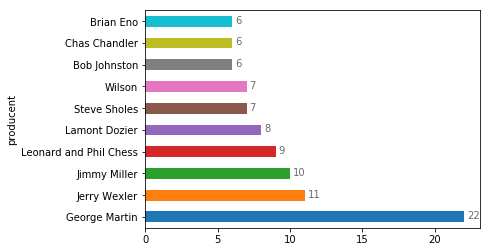

In [189]:
producenti10 = producenti.groupby("producent").size().sort_values(ascending = False).head(10).plot.barh()
for i in producenti10.patches:
    producenti10.text(i.get_width()+.2, i.get_y()+.15, \
            i.get_width(), fontsize=10, color='dimgrey')

George_Martin = skladbe[skladbe.producent.str.contains("George Martin")]

## Billboard

Če si sedaj ogledamo še uvrstitve skladb na lestvici Billboard. Na spodnjem grafu je prikazana povezava med zaporednim mestom na naši lestvici ter številom tednov, ki jih je pesem preživela na Billboard lestvici. Opazimo, da povezave, najvišje število tednov imajo celo skladbe pri koncu lestvice. Podobno lahko vidimo tudi na drugem grafu, kjer je prikazno najvišje mesto na lestvici Billboard v odvisnosti od mesta na naši lestvici. Skozi celotno lestvico lahko opazimo bolj kot ne enakomerno porazdelitev, kar pomeni, da nista v korelaciji.

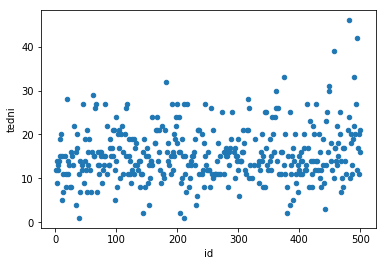

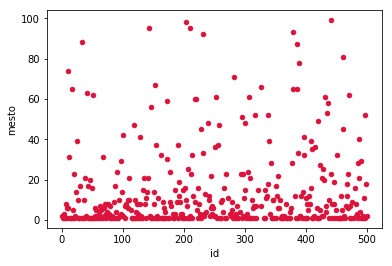

In [224]:
skladbe.plot.scatter("id","tedni")
skladbe.plot.scatter("id","mesto", color = "crimson")

In [ ]:
uspesne = skladbe[skladbe.mesto <= 5].sort_values(['mesto', 'id'], ascending=[True, True])

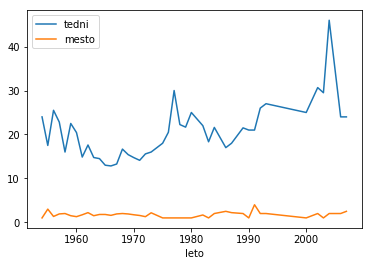

In [207]:
uspesne.groupby("leto").mean().plot()

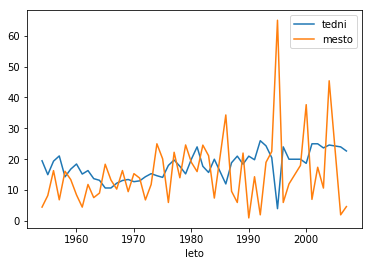

In [199]:
skladbe[skladbe.mesto <= 1000].groupby("leto").mean().plot()

In [37]:
skladbe_po_desetletjih = skladbe.groupby('desetletje')

In [81]:
skladbe_po_letih = skladbe.groupby('leto')

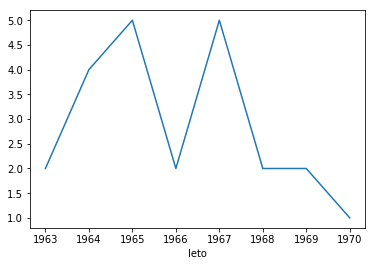

In [226]:
skladbe[skladbe.izvajalec == "The Beatles"].groupby("leto").size().plot()

In [228]:
skladbe[skladbe.izvajalec == "Bob Dylan"]

,id,izvajalec,naslov,avtor,producent,leto,zalozba,tedni,mesto,album
87,413,Bob Dylan,Visions of Johanna,['Dylan'],['Bob Johnston'],1966,Columbia,NaN,NaN,Blonde on Blonde
127,373,Bob Dylan,Highway 61 Revisited,['Dylan'],['Bob Johnston'],1965,Columbia,NaN,NaN,Highway 61 Revisited
160,340,Bob Dylan,Subterranean Homesick Blues,['Dylan'],['Tom Wilson'],1965,Columbia,8.0,39.0,Bringing It All Back Home
240,260,Bob Dylan,Mississippi,['Dylan'],['Jack Frost'],2001,Columbia,NaN,NaN,Love and Theft
268,232,Bob Dylan,Just Like a Woman,['Dylan'],['Bob Johnston'],1966,Columbia,6.0,33.0,Blonde on Blonde
294,206,Bob Dylan,Positively 4th Street,['Dylan'],['Bob Johnston'],1965,Columbia,9.0,7.0,The Essential Bob Dylan
308,192,Bob Dylan,Knockin' on Heaven's Door,['Dylan'],['Gordon Carroll'],1973,Columbia,16.0,12.0,The Essential Bob Dylan
313,187,Bob Dylan,Desolation Row,['Dylan'],['Bob Johnston'],1965,Columbia,NaN,NaN,Highway 61 Revisited
393,107,Bob Dylan,Mr. Tambourine Man,['Dylan'],['Tom Wilson'],1965,Columbia,NaN,NaN,Bringing it All Back Home
432,68,Bob Dylan,Tangled Up in Blue,['Dylan'],['Dylan'],1975,Columbia,7.0,31.0,Blood on the Tracks


In [179]:
zdruzeno = pd.merge(skladbe2, avtorji,left_on = "id",right_on = "skladba")

In [182]:
zdruzeno.tail(20)

,izvajalec,leto,zalozba,tedni,mesto,skladba,avtor
877,Bob Dylan,1963,Columbia,NaN,NaN,14,Bob Dylan
878,The Beatles,1965,Capitol,11.0,1.0,13,John Lennon
879,The Beatles,1965,Capitol,11.0,1.0,13,Paul McCartney
880,Sam Cooke,1964,RCA,7.0,31.0,12,Sam Cooke
881,The Who,1965,Decca,5.0,74.0,11,Pete Townshend
882,Ray Charles,1959,Atlantic,15.0,6.0,10,Ray Charles
883,Nirvana,1991,DGC,20.0,6.0,9,Kurt Cobain
884,The Beatles,1968,Apple,19.0,1.0,8,John Lennon
885,The Beatles,1968,Apple,19.0,1.0,8,Paul McCartney
886,Chuck Berry,1958,Chess,15.0,8.0,7,Chuck Berry


In [124]:
zdruzeno[zdruzeno.izvajalec == zdruzeno.avtor].groupby("avtor").size().sort_values(ascending = False).head(10)

avtor
Bob Dylan            13
Chuck Berry           6
Elton John            5
James Brown           5
Stevie Wonder         4
David Bowie           4
Roy Orbison           4
Sam Cooke             4
Bruce Springsteen     4
Prince                4
dtype: int64